In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [ ]:
#bus_data = pd.read_csv('L_data_merged.csv')

In [2]:
a = pd.read_csv("CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route (1).csv")
b = pd.read_csv("CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv")
#b = b.dropna(axis=1)
merged = pd.merge(a,b)
merged

#merged.to_csv("output.csv")

,route,date,daytype,rides,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
0,3,1/1/01,U,7354,King Drive,1/1/01,21406.5,13210.7,8725.3,567413
1,3,1/1/01,U,7354,King Drive,2/1/01,23226.0,14743.0,10136.2,564037
2,3,1/1/01,U,7354,King Drive,3/1/01,23081.6,14786.6,8979.5,617646
3,3,1/1/01,U,7354,King Drive,4/1/01,21917.1,15266.7,9533.3,568992
4,3,1/1/01,U,7354,King Drive,5/1/01,22897.3,13867.4,8847.8,603448
...,...,...,...,...,...,...,...,...,...,...
184328012,999,10/31/16,W,2,Special Dest Signs,10/1/16,2.1,0.0,0.0,2
184328013,999,10/31/16,W,2,Special Dest Signs,8/1/18,1.0,0.0,0.0,1
184328014,999,8/16/18,W,1,Special Dest Signs,10/1/16,2.1,0.0,0.0,2
184328015,999,8/16/18,W,1,Special Dest Signs,8/1/18,1.0,0.0,0.0,1


In [ ]:
#merged["routename"].unique()

In [3]:
new_merged = merged.drop(columns=["Month_Beginning","Avg_Weekday_Rides","Avg_Saturday_Rides","Avg_Sunday-Holiday_Rides","MonthTotal"])

In [4]:
d = new_merged.drop_duplicates()


In [ ]:
#common = pd.merge(a, b, how='left', left_on=['route'], right_on=['routename', 'date', 'daytype','rides']).dropna()
#common

In [5]:
bus_merged = pd.DataFrame(d)
#bus_merged.columns
#bus_merged

In [6]:
bus_merged['date'] = pd.to_datetime(bus_merged['date'], infer_datetime_format=True)

In [7]:
#fig, ax = plt.subplots(figsize=(20,40))
# use unstack()
#bus_merged.groupby(['date','routename']).sum()['rides'].unstack().plot(ax=ax)

In [8]:
#lines = bus_merged.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('routename')]).agg({
#    'rides': 'sum'
#})
#lines


#df_top_5 = pd.DataFrame(lines)
#df_top_5

In [9]:
bus_data_1yr = bus_merged.loc[(bus_merged['date']>= "12-31-2018") & (bus_merged['date']<= "12-30-2019")]
#bus_data_1yr.columns

In [10]:
top_five_1y = bus_data_1yr.loc[(bus_data_1yr['routename'] == '79th')|(bus_data_1yr['routename'] == 'Chicago')|(bus_data_1yr['routename'] == "Halsted")|(bus_data_1yr['routename'] == "Cottage Grove")|(bus_data_1yr['routename'] == "Belmont")] 

In [11]:
lines = top_five_1y.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('routename')]).agg({
    'rides': 'sum'
})

df_top_5 = pd.DataFrame(lines)
df_top_5


rides
date       routename            
2019-01-06 79th           118518
           Belmont         84429
           Chicago         97245
           Cottage Grove   92790
           Halsted         80224
...                          ...
2020-01-05 79th            17193
           Belmont         14042
           Chicago         15333
           Cottage Grove   14342
           Halsted         12970

[265 rows x 1 columns]

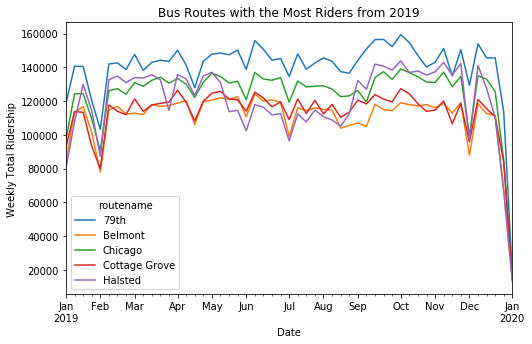

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
# use unstack()
df_top_5.groupby(['date','routename']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Bus Routes with the Most Riders from 2019')
plt.savefig("Images/Top Five Bus Routes.png")
plt.show()


## Analysis

79th has the highest number of riders in the year of 2019. It starts off at lake shore drive then goes towards evergreen park. Cottage Grove bus route follows the green line. It starts at south water and then goes to cotttage grove. Belmont goes from Lincoln Park to River Grove. The Chicago bus route goes from Austin to Navy Pier. There is a huge dip in travel ridership on new years eve. There is also a drop around december most likely because it is Christmas. There also is high ridership around the summer (May - June) and fall months (September - November). This is because people are traveling to summer festivals such as Lollapalloza and the fall probably has a high number of people traveling to work. Theere is also a dorp in ridership in February which might be because it is around valentines day or the weather gets much colder and people are less likely to ride the bus when the weather is really cold. The weather around that time specifically was 20 to 25 degress celcius in 2019. 

In [27]:
worst_five_1y = bus_data_1yr.loc[(bus_data_1yr['routename'] == 'Avon Express')|(bus_data_1yr['routename'] == 'Pullman Shuttle')|(bus_data_1yr['routename'] == "69th-UPS Express")|(bus_data_1yr['routename'] == "55th/Austin")|(bus_data_1yr['routename'] == "West 65th")] 

In [28]:
lines1 = worst_five_1y.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('routename')]).agg({
    'rides': 'sum'
})

df_worst = pd.DataFrame(lines1)
df_worst

rides
date       routename              
2019-01-06 55th/Austin         828
           69th-UPS Express    434
           Avon Express         27
           Pullman Shuttle    1105
           West 65th           552
...                            ...
2020-01-05 55th/Austin         190
           69th-UPS Express     59
           Avon Express         14
           Pullman Shuttle     203
           West 65th           141

[265 rows x 1 columns]

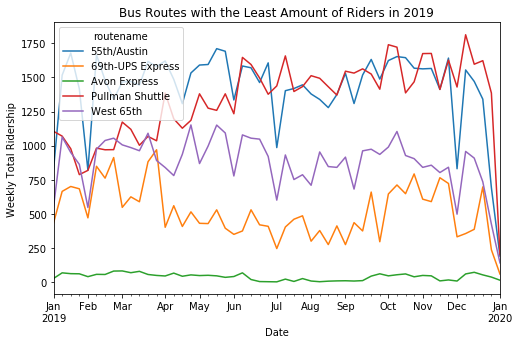

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
# use unstack()
df_worst.groupby(['date','routename']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Bus Routes with the Least Amount of Riders in 2019')
plt.savefig("Images/Least Five Bus Routes.png")
plt.show()


## Analysis

55th/Austin bus station goes from Austin to the South Shore in Chicago. Pullman Shuttle goes from West Pullman toward the West Loop. 69th-UPS Express goes from South Side/Englewood towards a UPS facility towards Willowbrook. Avon Express goes from Avalon Park to Calumet Park and then also goes towards Midway. West 65th goes from Cicero to Westmont/Darien. Drop in ridership in January in general. Avon Express only has two stops at the moment from Waukegan to Jefferson Park. 

In [33]:
list_nm = bus_data_1yr.groupby(['routename']).sum()['rides']
ten = list_nm.sort_values(ascending=True)
print(ten[:10])

routename
Avon Express               2087
Soldier Field Express      6736
69th-UPS Express          27405
United Center Express     27496
Museum of S & I           45298
West 65th                 46511
Museum Campus             62073
Pullman Shuttle           70698
55th/Austin               75279
Jeffery Manor Express    123234
Name: rides, dtype: int64


In [34]:
bus_data_2020 = bus_merged.loc[bus_merged['date']>= '01-01-2020']
bus_data_2020

,route,date,daytype,rides,routename
1609848,3,2020-01-01,U,6053,King Drive
1610080,3,2020-01-02,W,13074,King Drive
1610312,3,2020-01-03,W,13640,King Drive
1610544,3,2020-01-04,A,8483,King Drive
1610776,3,2020-01-05,U,6305,King Drive
...,...,...,...,...,...
184327792,31,2020-04-24,W,84,31st
184327836,31,2020-04-27,W,97,31st
184327880,31,2020-04-28,W,63,31st
184327924,31,2020-04-29,W,50,31st


In [35]:
top_5_covid = bus_data_2020.loc[(bus_data_2020['routename'] == '79th')|(bus_data_2020['routename'] == 'Chicago')|(bus_data_2020['routename'] == "Halsted")|(bus_data_2020['routename'] == "Cottage Grove")|(bus_data_2020['routename'] == "Belmont")] 

In [36]:
lines2 = top_5_covid.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('routename')]).agg({
    'rides': 'sum'
})

df_top_5_covid = pd.DataFrame(lines2)
df_top_5_covid

rides
date       routename           
2020-01-05 79th           80435
           Belmont        56239
           Chicago        65422
           Cottage Grove  61991
           Halsted        57776
...                         ...
2020-05-03 79th           42253
           Belmont        15720
           Chicago        24326
           Cottage Grove  30800
           Halsted        19493

[90 rows x 1 columns]

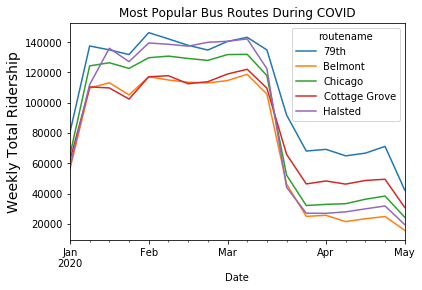

In [46]:
fig, ax = plt.subplots()
# use unstack()
df_top_5_covid.groupby(['date','routename']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership',fontsize=14)
ax.set_xlabel('Date')
ax.set_title('Most Popular Bus Routes During COVID')
plt.savefig("Images/Top Five Bus Routes During COVID.png", bbox_inches="tight")
plt.show()


## Analysis

In general COVID slowed down the ridership due to travel restrictions on social distancing. There does seem to be a little spike at the end of April which is probably people coming out of their two week social distancing and needing a way to get to work.

In [41]:
worst_five_covid = bus_data_2020.loc[(bus_data_2020['routename'] == 'Avon Express')|(bus_data_2020['routename'] == '55th/Austin')|(bus_data_2020['routename'] == "69th-UPS Express")|(bus_data_2020['routename'] == "Pullman Shuttle")|(bus_data_2020['routename'] == "West 65th")] 

In [42]:
lines2 = worst_five_covid.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('routename')]).agg({
    'rides': 'sum'
})

df_worst_5_covid = pd.DataFrame(lines2)
df_worst_5_covid

rides
date       routename              
2020-01-05 55th/Austin         538
           69th-UPS Express    105
           Avon Express         35
           Pullman Shuttle    1000
           West 65th           271
...                            ...
2020-05-03 55th/Austin         112
           69th-UPS Express    281
           Avon Express         28
           Pullman Shuttle     629
           West 65th           195

[90 rows x 1 columns]

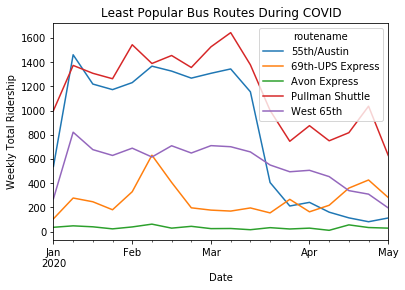

In [48]:
fig, ax = plt.subplots()
# use unstack()
df_worst_5_covid.groupby(['date','routename']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Least Popular Bus Routes During COVID')
plt.savefig("Images/Least Five Bus Routes During COVID.png",bbox_inches="tight")
plt.show()


## Analysis 

There is a drop in travels during COVID but there is a little spike in travels for the Pullman Shuttle and 69th-UPS Express. The bus routes might potentially be important to individuals going to work. 